In [71]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from braket.circuits import observables

def visualize_states(counter, label1, counter2=None, label2=None, counter3=None, label3=None):
    """Plot state's frequencies."""
        
    fig, ax = plt.subplots(figsize=(5, 5 * 6/8))
    
    ax.set_title('State visualization')
    ax.set_xlabel('States')
    ax.set_ylabel('#')
    plt.xticks(rotation=90)
       
    for i, state in enumerate(counter):
        if i == 0 and counter2 is not None:
            ax.bar(state, counter[state], color='#C194D8', edgecolor="black", label=label1)
        else:
            ax.bar(state, counter[state], color='#C194D8', edgecolor="black")
            
    if counter2 is not None:
        for i, state in enumerate(counter2):
            if i == 0:
                ax.bar(state, counter2[state], color='orange', alpha=1, edgecolor="black", hatch="\\\\", facecolor="none", label=label2)
            else:
                ax.bar(state, counter2[state], color='orange', alpha=1, edgecolor="black", hatch="\\\\", facecolor="none")  
        plt.legend()
    if counter3 is not None:
        for i, state in enumerate(counter3):
            if i == 0:
                ax.bar(state, counter3[state], color='pink', alpha=1, edgecolor="black", hatch="////", facecolor="none", label=label3)
            else:
                ax.bar(state, counter3[state], color='pink', alpha=1, edgecolor="black", hatch="////", facecolor="none")  
        plt.legend()


def generate_bitstring_combinations(n):
    """Generate all bitstring combinations given bitstring length `n`."""
    bitstrings = []
    for i in range(2**n):
        bitstrings.append(format(i, f"0{n}b"))
    return bitstrings

In [72]:
aria1_BuiltinErrorMitigation_frequencies = {'000': 154, '001': 633, '010': 102, '011': 717, '100': 79, '101': 161, '110': 186, '111': 468}
aria1_frequencies = {'000': 70, '001': 663, '010': 101, '011': 714, '100': 76, '101': 140, '110': 266, '111': 470}
harmony_frequencies = {'000': 211, '001': 502, '010': 111, '011': 654, '100': 168, '101': 126, '110': 224, '111': 504}
local_simulator_frequencies = {'000': 84, '001': 556, '010': 35, '011': 672, '100': 21, '101': 122, '110': 132, '111': 378}

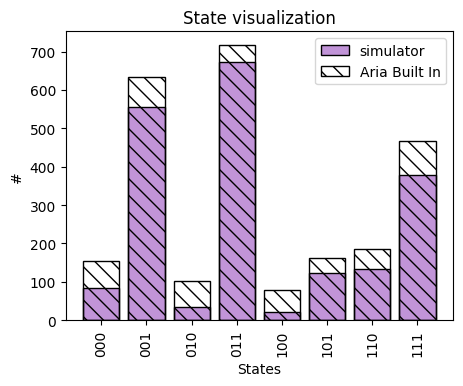

In [77]:
visualize_states(local_simulator_frequencies, "simulator", aria1_BuiltinErrorMitigation_frequencies, "Aria Built In")

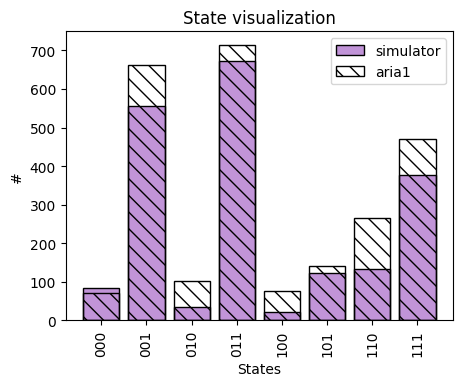

In [78]:
visualize_states(local_simulator_frequencies, "simulator", aria1_frequencies, "aria1")

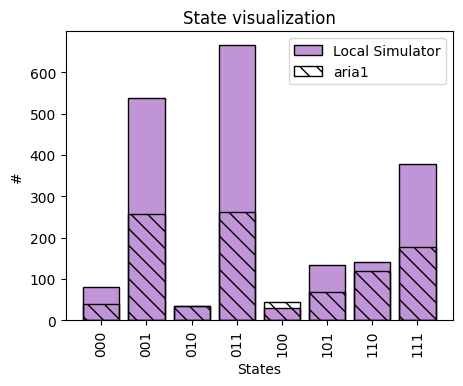

In [42]:
visualize_states(local_simulator_frequencies, "Local Simulator", aria1_frequencies, "aria1")

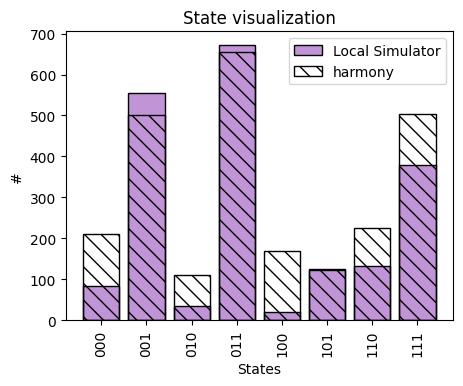

In [79]:
visualize_states(local_simulator_frequencies, "Local Simulator", harmony_frequencies, "harmony")

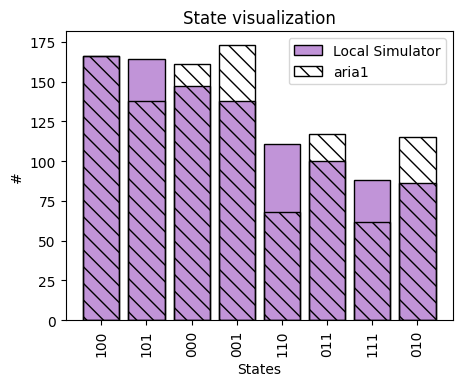

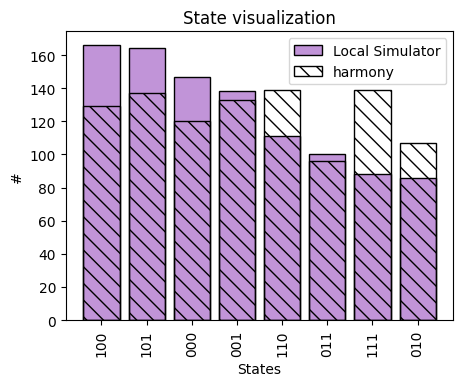

In [23]:
visualize_states(local_simulator_frequencies, "Local Simulator", harmony_frequencies, "harmony")

In [75]:
obs_matrix = np.array([[-3.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,3.-0.j]])

def expectation_from_samples(obs, freq, qubit_map=None):
    if np.count_nonzero(obs - np.diag(np.diagonal(obs))) != 0:
        raise_error(NotImplementedError, "Observable is not diagonal.")
    keys = list(freq.keys())
    if qubit_map is None:
        qubit_map = list(range(int(np.log2(len(obs)))))
    counts = np.array(list(freq.values())) / sum(freq.values())
    expval = 0
    size = len(qubit_map)
    for j, k in enumerate(keys):
        index = 0
        for i in qubit_map:
            index += int(k[qubit_map.index(i)]) * 2 ** (size - 1 - i)
        expval += obs[index, index] * counts[j]
    return np.real(expval)

In [64]:
expectation_from_samples(obs_matrix, local_simulator_frequencies)

0.598

In [65]:
expectation_from_samples(obs_matrix, aria1_frequencies)

0.5920000000000001

In [74]:
expectation_from_samples(obs_matrix, harmony_frequencies)

0.4408000000000001

In [66]:
expectation_from_samples(obs_matrix, aria1_BuiltinErrorMitigation_frequencies)

0.4768